## INTRODUCTION

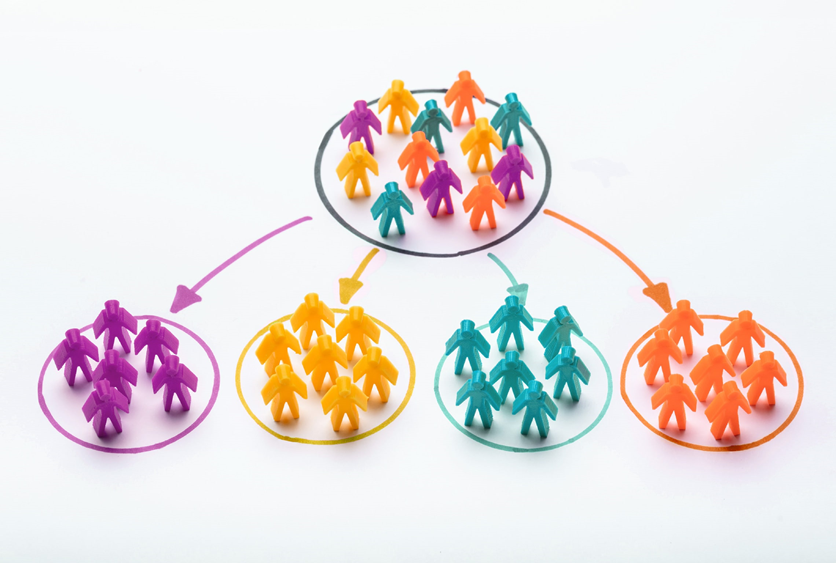

Customer segmentation is the division of customers into groups based on common characteristics in order to increase sales through personalized content tailored to the respective segment.

There are various methods of customer segmentation, including clustering, RFM segmentation and predictive models.In this notebook we will focus on customer segmentation with RFM.
The “RFM” in RFM analysis stands for recency, frequency and monetary value. These are the metrics that will be considered.

* Recency – How recently did the customer purchase? Highest score refers to the customer with the nearest last shopping date

* Frequency – How often do they purchase?Total number of purchases. this value can be the number of Invoices or the number of products in an invoice or the number of website visits. In other words, it can be not only purchasing the product, but also using the service.

* Monetary Value – How much do they spend?

## Context

The dataset named Online Retail II was obtained from a UK-based online store and includes sales from 01/12/2009 to 09/12/2011.

This company sells souvenirs and most of their customers are also wholesalers. Within the scope of this study, only 2010-2011 sales will be consedered.

## Business Problem

Our aim is to apply RFM analysis to the online retail II dataset and to include customers with common behaviors in the same groups and segment them to develop special sales and marketing techniques for these groups.

The company believes that marketing activities specific to customer segments with common behaviors will increase revenue. For example, it is desired to organize different campaigns for new customers and different campaigns to retain customers, which are very profitable for the company.

## Task Details

* Data Preprocessing
* Calculating RFM Metrics
* Calculating RFM Scores
* Creating RFM Segments

## Attribute Information:

**InvoiceNo:** Invoice number. The unique number of each transaction, that is, the invoice. Aborted operation if it starts with C.

**StockCode:** Product code. Unique number for each product.

**Description:** Product name

**Quantity:** Number of products. It expresses how many of the products on the invoices have been sold.

**InvoiceDate:** Invoice date and time.

**UnitPrice:** Product price (in GBP)

**CustomerID:** Unique customer number

**Country:** Country name. Country where the customer lives.

### IMPORTING LIBRARIES AND DATA

In [1]:
import datetime as dt
import pandas as pd
!pip install openpyxl
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

     |████████████████████████████████| 242 kB 2.0 MB/s            


In [2]:
df = pd.read_excel("../input/uci-online-retail-ii-data-set/online_retail_II.xlsx",sheet_name="Year 2010-2011")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom


### 1. DATA PREPROCESSING

In [3]:
df.shape

(541910, 8)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.00000,9.55223,218.08096,-80995.00000,1.00000,3.00000,10.00000,80995.00000
Price,541910.00000,4.61114,96.75977,-11062.06000,1.25000,2.08000,4.13000,38970.00000
Customer ID,406830.00000,15287.68416,1713.60307,12346.00000,13953.00000,15152.00000,16791.00000,18287.00000


In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

There are missing values in Description and Customer ID columns, we will remove them from the DataFrame.
In the DataFrame there are some invoices that include "C" which means that they are cancelled transactions so we will remove them from our DataFrame

In [6]:
df.dropna(inplace=True)
df = df[~df["Invoice"].str.contains("C", na=False)]

In [7]:
df = df[(df['Quantity'] > 0)]
df = df[(df['Price'] > 0)]
df.shape

(397885, 8)

We create a variable named 'TotalPrice' that represents the total earnings per invoice

In [8]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [9]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,15.30000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,22.00000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000


### 2. CALCULATING RFM METRICS

In [10]:
today_date=dt.datetime(2011,12,11)
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [11]:
rfm=df.groupby("Customer ID").agg({"InvoiceDate": lambda x :(today_date-x.max()).days,
                               "Invoice": lambda x : x.nunique(),
                               "TotalPrice":lambda x : x.sum()})
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00000,326,1,77183.60000
12347.00000,3,7,4310.00000
12348.00000,76,4,1797.24000
12349.00000,19,1,1757.55000
12350.00000,311,1,334.40000


In [12]:
rfm.columns

Index(['InvoiceDate', 'Invoice', 'TotalPrice'], dtype='object')

In [13]:
rfm.columns=["recency","frequency","monetary"]
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.00000,326,1,77183.60000
12347.00000,3,7,4310.00000
12348.00000,76,4,1797.24000
12349.00000,19,1,1757.55000
12350.00000,311,1,334.40000


In [14]:
rfm=rfm[rfm["monetary"]>0]

In [15]:
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346.00000,326,1,77183.60000
12347.00000,3,7,4310.00000
12348.00000,76,4,1797.24000
12349.00000,19,1,1757.55000
12350.00000,311,1,334.40000


### 3. CALCULATING RFM SCORES

As the metrics are not comparable with each other, they must be converted into scores. It is also difficult to evaluate metrics in themselves. It cannot be easily understood whether the metric we observed is the largest value in that column or not.

F and R values are prioritized compared to customers with very high turnover, who trade very infrequently or who have not traded for a very long time.
In case of need, micro segments can be created according to M breakdowns for customers with high turnover/high profitability.
Because of that reason we will include F and R metrics in the rfm_score

In [16]:
rfm["receny_score"] = pd.qcut(rfm["recency"],5,labels=[5,4,3,2,1])

rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"),5,labels=[1,2,3,4,5])

In [17]:
rfm["rfm_score"]=rfm["receny_score"].astype("str")+rfm["frequency_score"].astype("str")

In [18]:
rfm.head()

,recency,frequency,monetary,receny_score,frequency_score,rfm_score
Customer ID,,,,,,
12346.00000,326,1,77183.60000,1,1,11
12347.00000,3,7,4310.00000,5,5,55
12348.00000,76,4,1797.24000,2,4,24
12349.00000,19,1,1757.55000,4,1,41
12350.00000,311,1,334.40000,1,1,11


In Recency, 5 represents the freshest customer and 1 represents the customer whose most recent purchase is outdated.
5 corresponds to best in Frequency and Monatery.
The best segment here is 55, the worst segment is 11.

### 4. CREATING RFM SEGMENTS

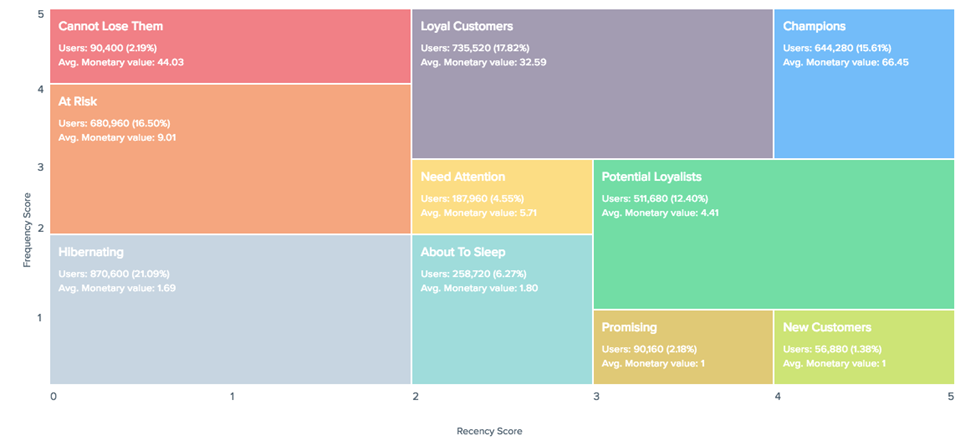

In [19]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}


rfm['segment'] = rfm['rfm_score'].replace(seg_map, regex=True)

rfm.head()

,recency,frequency,monetary,receny_score,frequency_score,rfm_score,segment
Customer ID,,,,,,,
12346.00000,326,1,77183.60000,1,1,11,hibernating
12347.00000,3,7,4310.00000,5,5,55,champions
12348.00000,76,4,1797.24000,2,4,24,at_Risk
12349.00000,19,1,1757.55000,4,1,41,promising
12350.00000,311,1,334.40000,1,1,11,hibernating


In [20]:
pareto_data = pd.DataFrame({"size" : rfm.groupby("segment")["monetary"].count() / rfm["monetary"].count(),
              "revenue"  : rfm.groupby("segment")["monetary"].sum() / rfm["monetary"].sum()})

pareto_data.sort_values(by= "revenue" ,ascending=False)

,size,revenue
segment,,
champions,0.14592,0.48714
loyal_customers,0.18880,0.26324
at_Risk,0.13670,0.07217
hibernating,0.24689,0.05873
potential_loyalists,0.11157,0.05655
cant_loose,0.01452,0.01977
need_attention,0.04311,0.01884
about_to_sleep,0.08114,0.01864
promising,0.02167,0.00310


### ANALYSING RFM SEGMENTS

We will focus on some of these groups and develop some strategies in order not to loose them and increase the revenue.

**Champions** are the best customers, who bought most recently, most often, and are heavy spenders. Reward these customers. They can be the first to buy new products

**Potential Loyalists** are the recent customers with average frequency and who spent a good amount. You can make them your Loyalists or Champions by offering membership or loyalty programs or recommending related products to them.

**New Customers** are the customers who have a high overall RFM score but are not frequent shoppers. Special offers can be provided to increase their visits

**At Risk Customers** are the customers who purchased often and spent big amounts, but haven’t purchased recently. Personalized deals and product/service recommendations can help reactivate them

**Can’t Lose Them** are the customers who used to visit and purchase quite often, but haven’t been visiting recently. Get them to revisit with relevant promotions and conduct surveys to find out what went wrong and not lose them to a competitor.